In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import total_count, column_description, separate_items


Let's read the data of the stackoverflow from the previous three years

In [3]:
file_name = 'Data/survey_results_public_2017.csv'
df_17 = pd.read_csv(file_name)

file_name = 'Data/survey_results_public_2018.csv'
df_18 = pd.read_csv(file_name)

file_name = 'Data/survey_results_public_2019.csv'
df_19 = pd.read_csv(file_name)

schema = pd.read_csv('Data/survey_results_schema.csv')


/home/nouman/anaconda3/envs/gsoc/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_19.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


### Business Understanding

We are interested in finding out the trend of popular languages among developers during the past three years

This will help us understand which languages are becoming obsolete and which are becoming popular over the years

Let's look at the question related to this:

In [5]:
column_description('LanguageWorkedWith', schema)

'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

### Data Understanding

In [6]:
df_19['LanguageWorkedWith'].value_counts().reset_index()

,index,LanguageWorkedWith
0,HTML/CSS;JavaScript;PHP;SQL,1483
1,C#;HTML/CSS;JavaScript;SQL,1414
2,HTML/CSS;JavaScript,1247
3,C#;HTML/CSS;JavaScript;SQL;TypeScript,990
4,Java,934
...,...,...
20093,HTML/CSS;Java;JavaScript;Kotlin;Python;R;SQL;T...,1
20094,Bash/Shell/PowerShell;C#;Java;PHP;SQL,1
20095,Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScr...,1
20096,Bash/Shell/PowerShell;C++;Go;Java;JavaScript;O...,1


This shows that many developers work with more than one language and that the languages should be separated before any analysis

### Data Preparation

Let's separate the languages to get a list of unique individual languages. `separate_items` is a function in utils.py that we would use for this. 

In [6]:
languages_list_19 = list(df_19.groupby(['LanguageWorkedWith']).mean().index)
languages_19 = separate_items(languages_list_19)

languages_list_18 = list(df_18.groupby(['LanguageWorkedWith']).mean().index)
languages_18 = separate_items(languages_list_18)

languages_list_17 = list(df_17.groupby(['HaveWorkedLanguage']).mean().index)
languages_17 = separate_items(languages_list_17)

languages_19[:5]

['Elixir', 'VBA', 'Other(s):', 'TypeScript', 'PHP']

Let's build a new dataframe that contains the individual languages and their count. The function `total_count` let's us do that.

In [7]:
languages_df19 = total_count(df_19, 'LanguageWorkedWith', 'count', 'Language', languages_19)

languages_df18 = total_count(df_18, 'LanguageWorkedWith', 'count', 'Language', languages_18)

languages_df17 = total_count(df_17, 'HaveWorkedLanguage', 'count', 'Language', languages_17)

In [8]:
languages_df19

,count
Language,
C,71988
Java,70113
JavaScript,59219
HTML/CSS,55466
SQL,47544
Python,36443
Bash/Shell/PowerShell,31991
C#,27097
PHP,23030


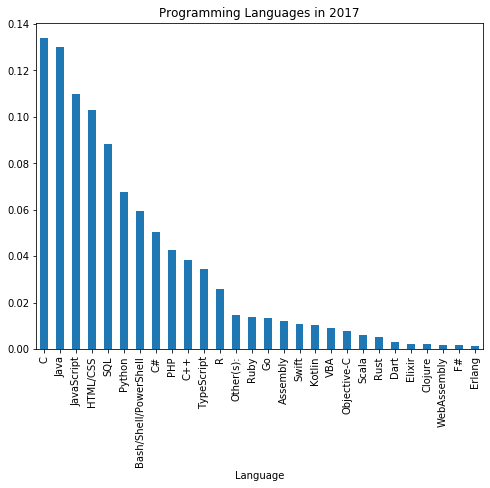

In [9]:
(languages_df19/languages_df19.sum()).plot(kind='bar', legend=None, title='Programming Languages in 2017', figsize=(8,6))

Looks like C and Java are the languages that are mostly used by developers in 2019

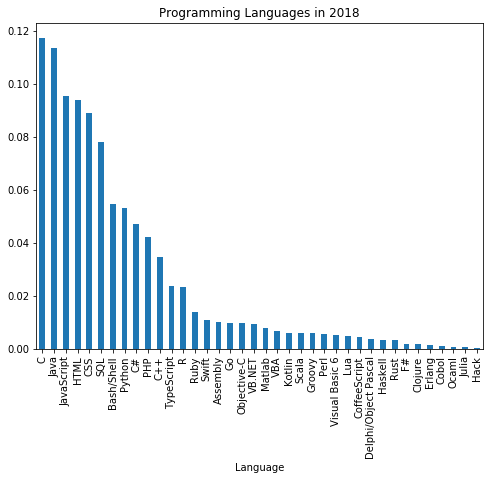

In [10]:
(languages_df18/languages_df18.sum()).plot(kind='bar', legend=None, title='Programming Languages in 2018', figsize=(8,6))

Same trend is seen in 2018 too

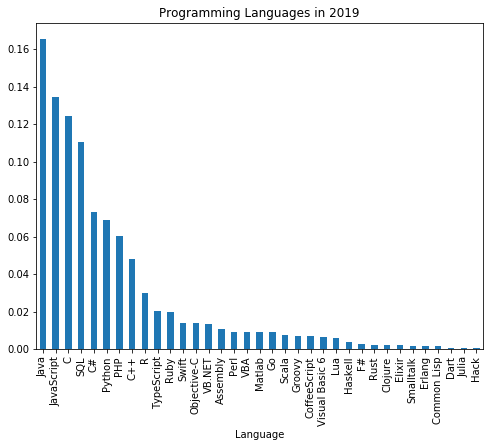

In [11]:
(languages_df17/languages_df17.sum()).plot(kind='bar', legend=None, title='Programming Languages in 2019', figsize=(8,6))

Java still seems to be on top but JavaScript is also seen as a frequently used language in 2017

Let's combine the three dataframes and plot them together

In [12]:
languages_df17_18 = pd.merge(languages_df17, languages_df18, on='Language')
all_languages_df = pd.merge(languages_df17_18, languages_df19, on='Language')
all_languages_df.columns = ['2017', '2018', '2019']

all_languages_df.head()

,2017,2018,2019
Language,,,
Java,28149,64912,70113
JavaScript,22875,54686,59219
C,21173,67063,71988
SQL,18754,44670,47544
C#,12476,26954,27097


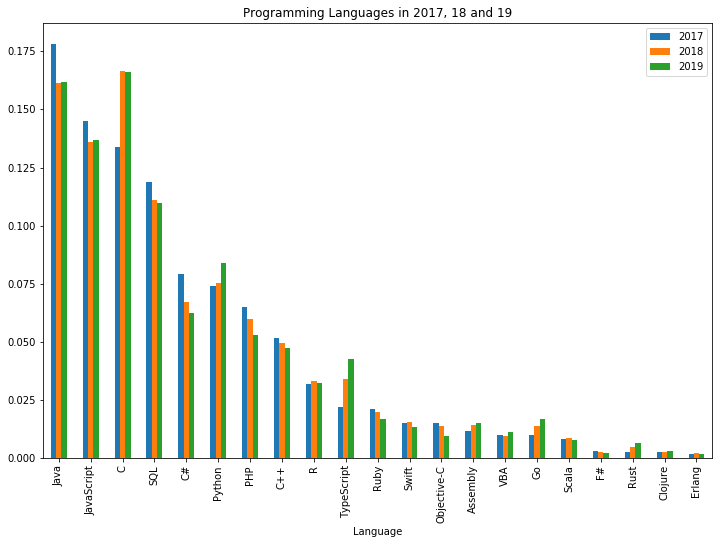

In [13]:
(all_languages_df/all_languages_df.sum()).plot(kind='bar', title='Programming Languages in 2017, 18 and 19', figsize=(12,8))

### Results Evaluation

Java and Javascript has seen a downfall in the percentage of developers while C has gotten more popular in 2018 as compared to 2017 but haven't risen after that. Python, TypeScript and Go are the main languages that have seen a rise in its users over the three years.